<a href="https://colab.research.google.com/github/RAJESH-creater/demo/blob/main/rajesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import nltk

In [6]:
sms=pd.read_csv('spam.csv',encoding='latin-1')
sms.head(-5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN


In [7]:
print(sms.shape)

(5572, 5)


In [8]:
print(sms)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [10]:
print(sms.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [11]:
sms = sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
sms = sms.rename(columns={"v1":'Label', "v2":'SMS'})
sms.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
print(sms.columns)

Index(['Label', 'SMS'], dtype='object')


In [15]:
for col in sms:
    print(col,":", sms[col].unique())

Label : ['ham' 'spam']
SMS : ['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']


In [16]:
print("no of rows",len(sms))

no of rows 5572


In [22]:
sms['Label'].value_counts()

,count
Label,
ham,4825
spam,747


In [24]:
sms.isnull().any()

,0
Label,False
SMS,False


In [25]:
sms.describe()

,Label,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [26]:
sms_dup = sms[sms.duplicated()]
print("number of duplicate rows:",len(sms_dup))

number of duplicate rows: 403


In [27]:
sms_cleaned = sms.drop_duplicates()
print(sms_cleaned.shape)

(5169, 2)


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 800x800 with 0 Axes>

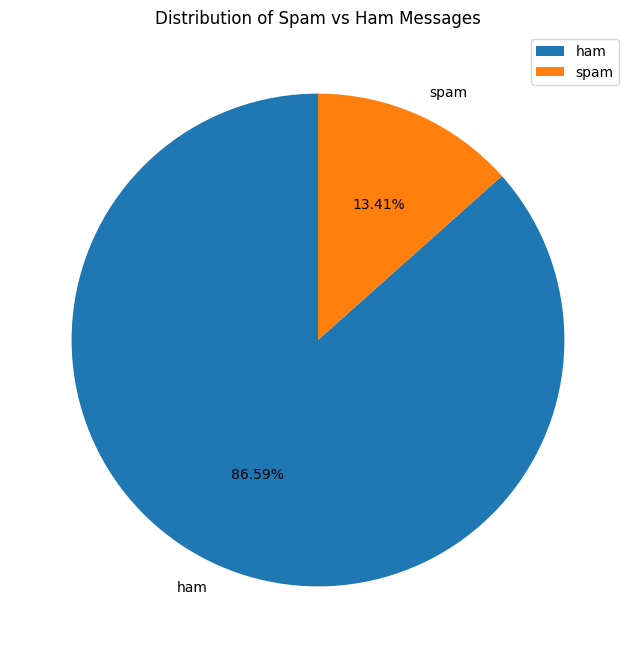

In [30]:
# Create the pie chart
plt.figure(figsize=(8, 8))
# Changed 'label' to 'Label' to match the renamed column name
sms_labels = sms['Label'].unique()
sms_values = sms['Label'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sms_values, labels=sms_labels, autopct='%1.2f%%', startangle=90)
plt.legend(loc='upper right')
plt.title('Distribution of Spam vs Ham Messages')
plt.show()
plt.show()

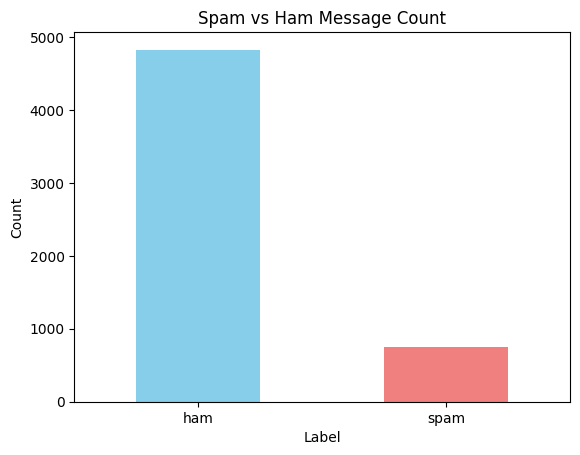

In [33]:


# Changed 'label' to 'Label' to match the renamed column name and removed duplicate plotting commands
sms['Label'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Spam vs Ham Message Count')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

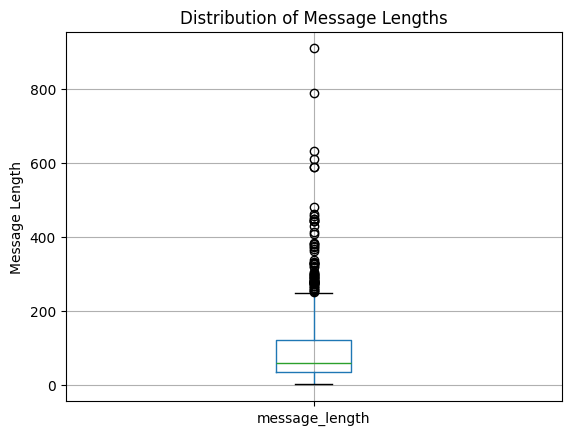

In [35]:
# Create a new column with the length of each message
sms['message_length'] = sms['SMS'].apply(len)

# Generate a boxplot for the 'message_length' column
boxplot = sms.boxplot(column='message_length', grid=True, vert=True, fontsize=10)

# Display the plot
plt.title('Distribution of Message Lengths')
plt.ylabel('Message Length')
plt.show()

<Axes: ylabel='Frequency'>

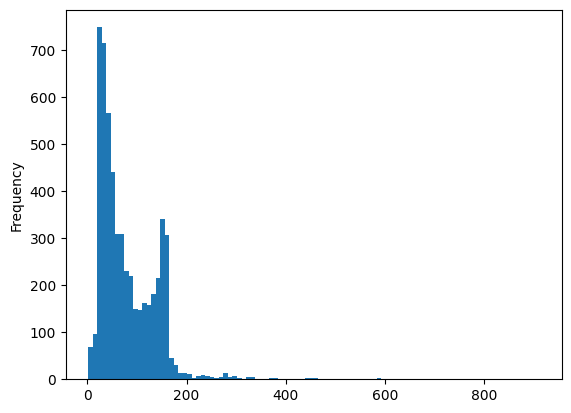

In [36]:
sms['message_length'].plot(bins=100, kind='hist')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

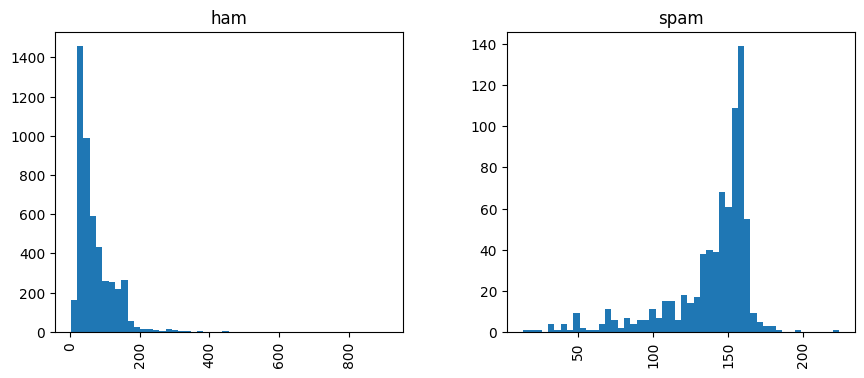

In [38]:
# Plot histograms for message lengths by label
sms.hist(column='message_length', by='Label', bins=50, figsize=(10,4))

training and testing


In [40]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and labels
# Changed 'text' to 'SMS' to match the renamed column name for features
X = sms['SMS']
# Changed 'label' to 'Label' to match the renamed column name for labels
y = sms['Label']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data, and transform the test data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

navy bios algorithm


Accuracy: 96.68%
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



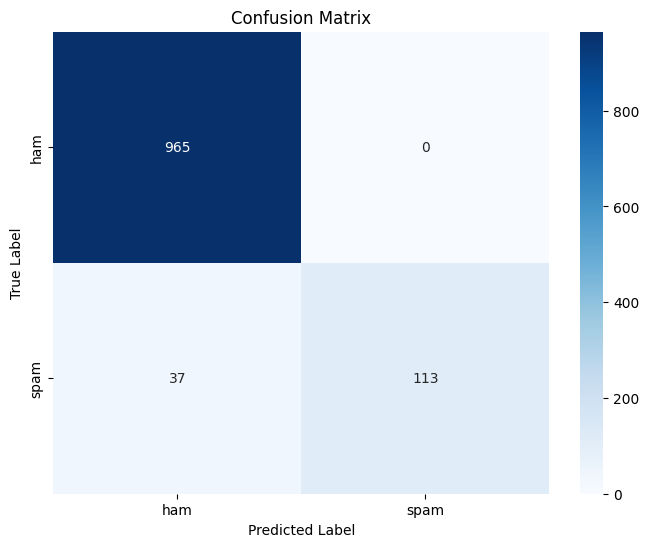

In [43]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Function to train and evaluate the model
def train_and_evaluate_model(X, y, test_size=0.2, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize the TF-IDF Vectorizer and transform the text data
    vectorizer = TfidfVectorizer(stop_words='english')
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Convert labels from strings ('ham', 'spam') to integers (0, 1)
    # Use LabelEncoder for this conversion
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Initialize and train the Naive Bayes model
    model = MultinomialNB()
    # Use the encoded labels for training and prediction
    model.fit(X_train_tfidf, y_train_encoded)

    # Make predictions on the test set
    y_pred = model.predict(X_test_tfidf)

    # Evaluate the model using the encoded test labels
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    # Print the classification report for additional metrics
    # Use the original labels for the report for better readability if desired,
    # but for metrics calculation, encoded labels are needed.
    # For simplicity and correctness with integer predictions, we'll use encoded.
    print("Classification Report:")
    print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)) # Provide target_names for report

    # Compute and plot the confusion matrix
    # Use the encoded test labels and predicted labels
    cm = confusion_matrix(y_test_encoded, y_pred)

    # Plot the confusion matrix using Seaborn
    plt.figure(figsize=(8, 6))  # Size of the plot
    # Use the original class names for axis labels
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Example usage:
# Assuming sms['SMS'] contains the text data and sms['Label'] contains the labels
# Changed 'text' to 'SMS' and 'label' to 'Label'
X = sms['SMS']
y = sms['Label']

# Call the function to train and evaluate the model
train_and_evaluate_model(X, y)

svm

Accuracy: 97.94%
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



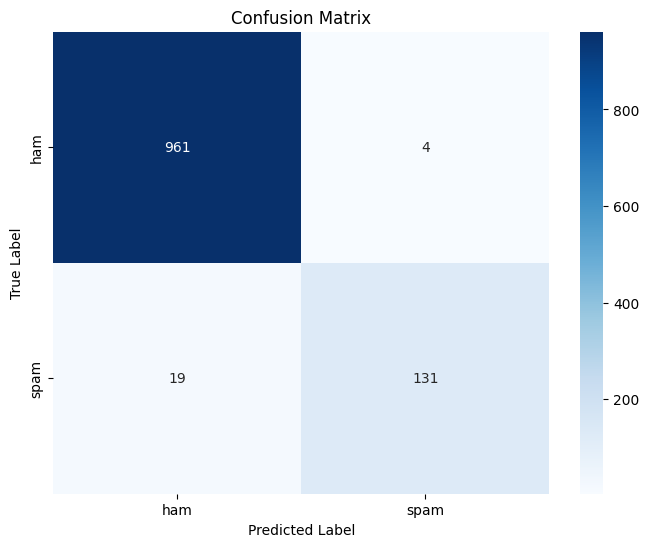

In [45]:
# Example usage:
# Assuming sms['text'] contains the text data and sms['label'] contains the labels
X = sms['SMS']  # Changed 'text' to 'SMS'
y = sms['Label'] # Changed 'label' to 'Label'

# Call the function to train and evaluate the model using SVM
train_and_evaluate_svm(X, y)

In [46]:
pip install tensorflow

In [47]:
pip install scikit-learn

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.8402 - loss: 0.4727 - val_accuracy: 0.9453 - val_loss: 0.1545
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9698 - loss: 0.1102 - val_accuracy: 0.9803 - val_loss: 0.0710
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9942 - loss: 0.0231 - val_accuracy: 0.9803 - val_loss: 0.0741
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9978 - loss: 0.0125 - val_accuracy: 0.9803 - val_loss: 0.0783
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9990 - loss: 0.0054 - val_accuracy: 0.9812 - val_loss: 0.0844
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 98.12%
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       965
        spam       0.96      0.90      0.93       150

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted 

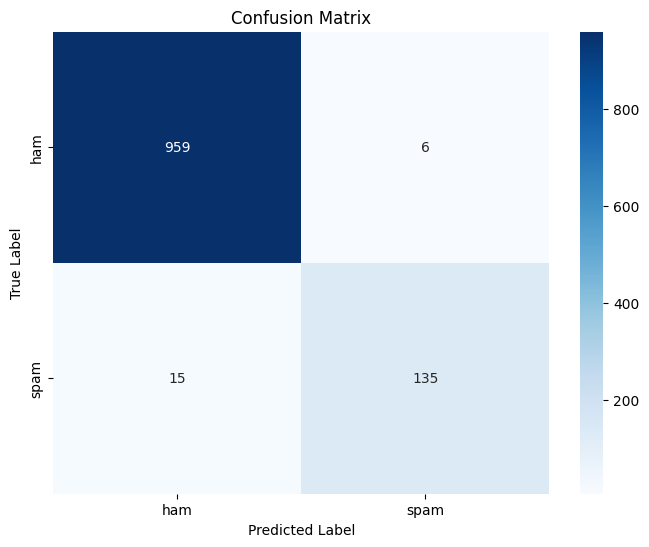

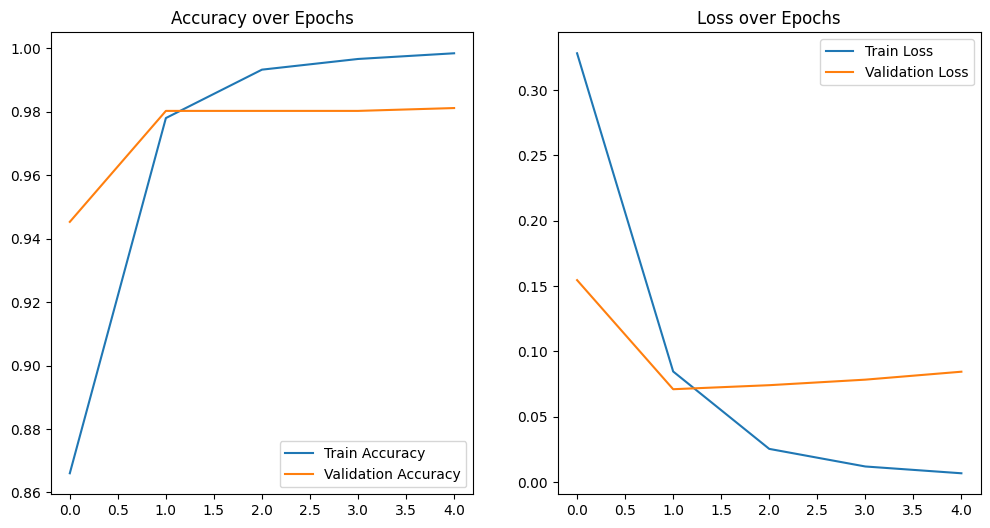

In [49]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Function to train and evaluate the Neural Network (DNN) Deep Neural Network
def train_and_evaluate_nn(X, y, test_size=0.2, random_state=42, epochs=5, batch_size=32):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize the TF-IDF Vectorizer and transform the text data
    vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit number of features for efficiency
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Convert labels from strings ('ham', 'spam') to integers (0, 1)
    # Use LabelEncoder for this conversion
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Convert the encoded labels into NumPy arrays
    y_train_array = np.array(y_train_encoded)
    y_test_array = np.array(y_test_encoded)


    # Build the Neural Network model
    model = Sequential()
    model.add(Dense(128, input_dim=X_train_tfidf.shape[1], activation='relu'))  # First hidden layer
    model.add(Dropout(0.5))  # Dropout layer for regularization
    model.add(Dense(64, activation='relu'))  # Second hidden layer
    model.add(Dropout(0.5))  # Dropout layer for regularization
    model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

    # Compile the model
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model using the encoded NumPy arrays
    history = model.fit(X_train_tfidf, y_train_array, epochs=epochs, batch_size=batch_size, validation_data=(X_test_tfidf, y_test_array))

    # Evaluate the model on the test set
    y_pred_prob = model.predict(X_test_tfidf)
    y_pred = (y_pred_prob > 0.5).astype(int)  # Predict probabilities and convert to binary labels

    # Evaluate the model using the encoded test labels
    accuracy = accuracy_score(y_test_array, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    # Print the classification report for additional metrics
    print("Classification Report:")
    # Use the original class names for the report for better readability by providing target_names
    print(classification_report(y_test_array, y_pred, target_names=label_encoder.classes_))

    # Compute and plot the confusion matrix
    cm = confusion_matrix(y_test_array, y_pred)

    # Plot the confusion matrix using Seaborn
    plt.figure(figsize=(8, 6))  # Size of the plot
    # Use the original class names for axis labels
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Plot training history (accuracy and loss)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.show()

# Example usage:
# Assuming sms['SMS'] contains the text data and sms['Label'] contains the labels
X = sms['SMS']  # Changed 'text' to 'SMS' to match the renamed column
y = sms['Label']  # Changed 'label' to 'Label' to match the renamed column

# Call the function to train and evaluate the model using Neural Network
train_and_evaluate_nn(X, y, epochs=5, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 122s 860ms/step - accuracy: 0.8825 - loss: 0.3226 - val_accuracy: 0.9785 - val_loss: 0.0919
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 108s 772ms/step - accuracy: 0.9738 - loss: 0.0755 - val_accuracy: 0.9821 - val_loss: 0.0745
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 142s 771ms/step - accuracy: 0.9894 - loss: 0.0393 - val_accuracy: 0.9830 - val_loss: 0.0764
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 141s 763ms/step - accuracy: 0.9937 - loss: 0.0212 - val_accuracy: 0.9821 - val_loss: 0.0950
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 153s 839ms/step - accuracy: 0.9947 - loss: 0.0185 - val_accuracy: 0.9830 - val_loss: 0.1001
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step
Accuracy: 98.30%
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.95      0.93      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96   

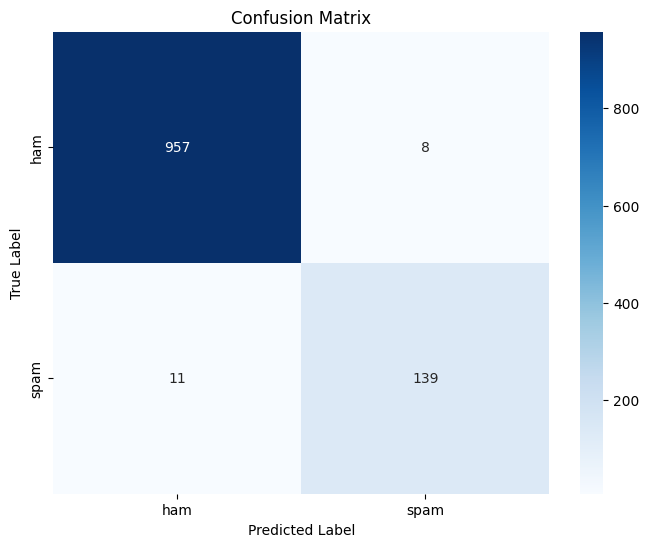

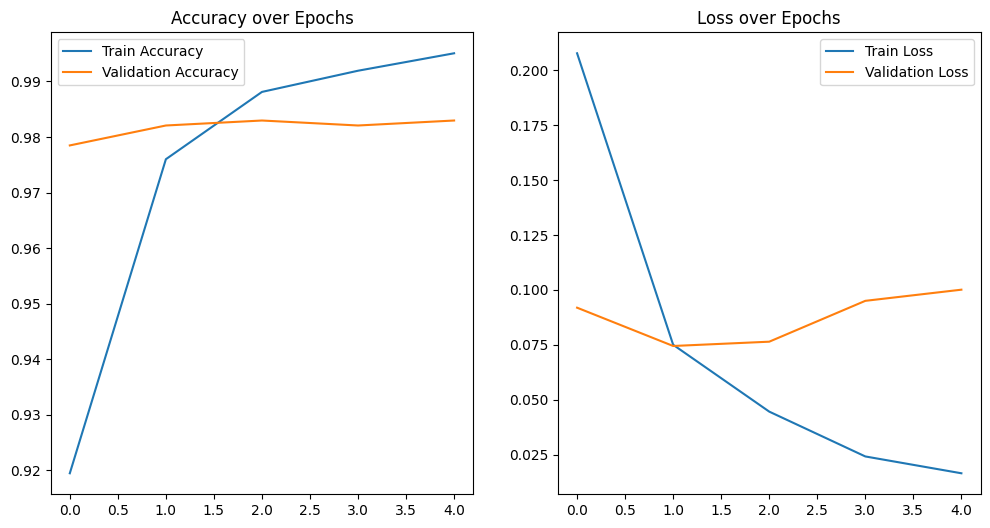

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Function to train and evaluate the CNN model
def train_and_evaluate_cnn(X, y, test_size=0.2, random_state=42, epochs=5, batch_size=32):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize the TF-IDF Vectorizer and transform the text data
    vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit number of features for efficiency
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Convert labels from strings ('ham', 'spam') to integers (0, 1)
    # Use LabelEncoder for this conversion
    label_encoder = LabelEncoder()
    # Fit and transform the training labels, and transform the test labels
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Convert the encoded labels into NumPy arrays
    y_train_array = np.array(y_train_encoded)
    y_test_array = np.array(y_test_encoded)


    # Reshape the input data to fit CNN: (samples, timesteps, features)
    X_train_cnn = X_train_tfidf.toarray().reshape(X_train_tfidf.shape[0], X_train_tfidf.shape[1], 1)
    X_test_cnn = X_test_tfidf.toarray().reshape(X_test_tfidf.shape[0], X_test_tfidf.shape[1], 1)

    # Build the CNN model
    model = Sequential()
    model.add(Conv1D(128, 5, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))  # Conv layer
    model.add(MaxPooling1D(pool_size=2))  # Max pooling layer
    model.add(Flatten())  # Flatten the output for fully connected layer
    model.add(Dense(64, activation='relu'))  # Fully connected layer
    model.add(Dropout(0.5))  # Dropout layer for regularization
    model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

    # Compile the model
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model using the encoded NumPy arrays
    history = model.fit(X_train_cnn, y_train_array, epochs=epochs, batch_size=batch_size, validation_data=(X_test_cnn, y_test_array))

    # Evaluate the model on the test set
    y_pred_prob = model.predict(X_test_cnn)
    y_pred = (y_pred_prob > 0.5).astype(int)  # Predict probabilities and convert to binary labels

    # Evaluate the model using the encoded test labels
    accuracy = accuracy_score(y_test_array, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    # Print the classification report for additional metrics
    print("Classification Report:")
    # Use the original class names for the report for better readability by providing target_names
    print(classification_report(y_test_array, y_pred, target_names=label_encoder.classes_))

    # Compute and plot the confusion matrix
    cm = confusion_matrix(y_test_array, y_pred)

    # Plot the confusion matrix using Seaborn
    plt.figure(figsize=(8, 6))  # Size of the plot
    # Use the original class names for axis labels
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Plot training history (accuracy and loss)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.show()

# Example usage:
# Assuming sms['SMS'] contains the text data and sms['Label'] contains the labels
X = sms['SMS']  # Changed 'text' to 'SMS' to match the renamed column
y = sms['Label']  # Changed 'label' to 'Label' to match the renamed column

# Call the function to train and evaluate the model using CNN
train_and_evaluate_cnn(X, y, epochs=5, batch_size=32)

<ipython-input-52-9dd77419a5a7>:38: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


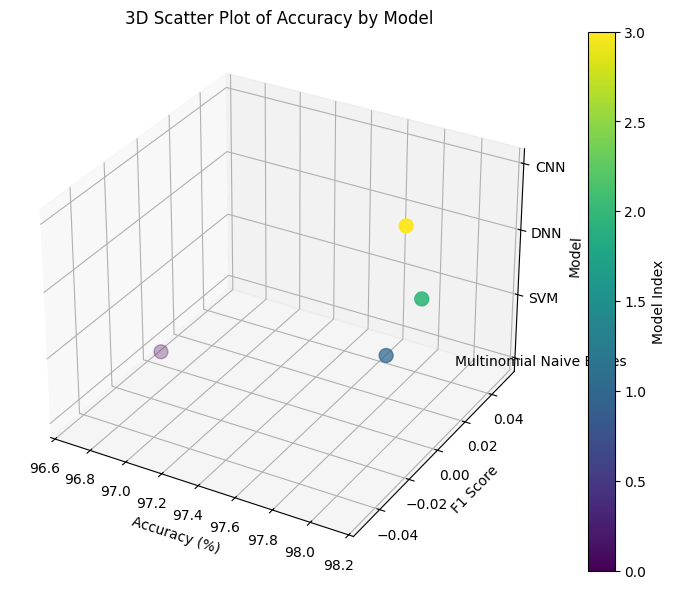

In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Model names
models = ['Multinomial Naive Bayes', 'SVM', 'DNN', 'CNN']

# Updated Accuracy values
accuracy = [96.68, 97.94, 98.12, 98.03]

# Create figure and 3D axis for Accuracy plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Convert model names to numbers for the Z-axis
z_values = np.arange(len(models))  # Assigning numbers 0, 1, 2, 3 for models

# Plotting 3D scatter plot for Accuracy
scatter = ax.scatter(accuracy, np.zeros_like(accuracy), z_values, c=z_values, cmap='viridis', s=100, marker='o')

# Setting labels for each axis
ax.set_xlabel('Accuracy (%)')
ax.set_ylabel('F1 Score')
ax.set_zlabel('Model')

# Customizing the Z-axis ticks to display model names
ax.set_zticks(z_values)
ax.set_zticklabels(models)

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Model Index')

# Set the title of the plot
ax.set_title('3D Scatter Plot of Accuracy by Model')

# Show the plot
plt.tight_layout()
plt.show()